## 1. Import libraries

In [149]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import warnings

pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:20,.10f}'.format

## 2. Load the datasets

- We have train and test datasets. For EDA step, we used "train.csv" dataset which assigned dataframe as "train".
- Remove "belongs_to_collection", "homepage", "spoken_languages", "poster_path" columns from train dataset and created new column which name is "percentage_change".
- In this assignment, we try to predict the "revenue" value with looking the "percentage_change" range.

In [228]:
fp = 'd:/kaggle/'
train = pd.read_csv(fp+'train.csv', index_col='id')
train.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.5753930000,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0000000000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.2488950000,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0000000000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.2999900000,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0000000000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.1749360000,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0000000000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.1480700000,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0000000000,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [229]:
train.genres

id
1                          [{'id': 35, 'name': 'Comedy'}]
2       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
3                           [{'id': 18, 'name': 'Drama'}]
4       [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
5       [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
6       [{'id': 16, 'name': 'Animation'}, {'id': 12, '...
7       [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
8                     [{'id': 99, 'name': 'Documentary'}]
9       [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...
10      [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...
11                          [{'id': 18, 'name': 'Drama'}]
12                         [{'id': 35, 'name': 'Comedy'}]
13                          [{'id': 18, 'name': 'Drama'}]
14      [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...
15      [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
16      [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...
17      [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...
18      [{'

In [237]:
from sklearn.preprocessing import RobustScaler

In [238]:
train_numeric = train[['budget', 'popularity', 'runtime']]
rs = RobustScaler()

In [239]:
train_numeric_scaled = rs.fit_transform(train_numeric)

In [248]:
min(train_numeric_scaled[:,2])

-4.333333333333333

- In this section, we are going to look the "release_date" feature detail. For this;

we need to convert our "release_date" feature into datetime format. we cannot used to datetime format function directly becuase of the inadequacy of datetime library. In our dataset, there are several movies which are released before 1968. If we use datetime library function, we are seeing these years which are less than 1968 as 2067,2065, etc. That's why we created if else sentence to convert the "release_Date" feature into datetime.

In [152]:
dc = train.release_date.str.rsplit("/", expand=True).astype(int)
date_list =[]
for i in range(1,len(dc)+1):
    if (dc[2][i]>19) & (dc[2][i]<69):
        new_date = str(dc[0][i])+"-"+str(dc[1][i])+"-19"+str(dc[2][i])
        date_list.append(new_date)
    elif(dc[2][i]>=69):
        new_date = str(dc[0][i])+"-"+str(dc[1][i])+"-19"+str(dc[2][i])
        date_list.append(new_date)
    elif(dc[2][i]<10):
        new_date = str(dc[0][i])+"-"+str(dc[1][i])+"-200"+str(dc[2][i])
        date_list.append(new_date)
    else:
        new_date = str(dc[0][i])+"-"+str(dc[1][i])+"-20"+str(dc[2][i])
        date_list.append(new_date)
    
train["release_date"] = pd.DataFrame(date_list)
train.release_date = pd.to_datetime(train.release_date)

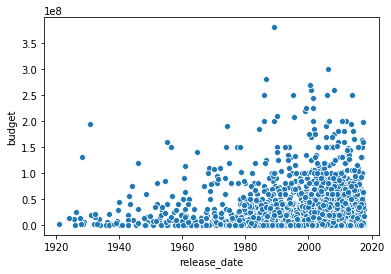

In [153]:
sns.scatterplot(x=train.release_date, y=train.budget)

- Unfortunately, Our precious ML models in scikit-learn don't allow datetime dataformat. So, we should change the dataformat after spliting year and month from release_date column

In [154]:
month = []
year = []
for i in range(len(date_list)):
    temp = date_list[i].split('-')
    month.append(temp[0])
    year.append(temp[2])

month = pd.Series(month, train.index, name='month')
year = pd.Series(year, train.index, name='year')

year = pd.to_datetime(train.release_date).dt.year
month = pd.to_datetime(train.release_date).dt.month

In [155]:
dump = train.release_date
train.drop('release_date', axis=1, inplace=True)

train = pd.concat((year, month, train), axis=1)

## 3. EDA & Feature engineering

### 1) Null values

- 'belongs_to_collection', 'homepage', 'tagline' columns contain many null values in the dataset, also it seems that there are a lot of difficulties to extract information from those columns. However, we want to keep those features for a while rather than drop it by transforming to binary variables

In [156]:
print('Ratio of Null value for each column\n')
print(train.isnull().sum().sort_values(ascending=False) / train.shape[0])

Ratio of Null value for each column

belongs_to_collection           0.7986666667
homepage                        0.6846666667
tagline                         0.1990000000
Keywords                        0.0920000000
production_companies            0.0520000000
production_countries            0.0183333333
spoken_languages                0.0066666667
crew                            0.0053333333
cast                            0.0043333333
overview                        0.0026666667
genres                          0.0023333333
runtime                         0.0006666667
poster_path                     0.0003333333
imdb_id                         0.0000000000
month                           0.0000000000
budget                          0.0000000000
revenue                         0.0000000000
original_language               0.0000000000
original_title                  0.0000000000
popularity                      0.0000000000
status                          0.0000000000
title             

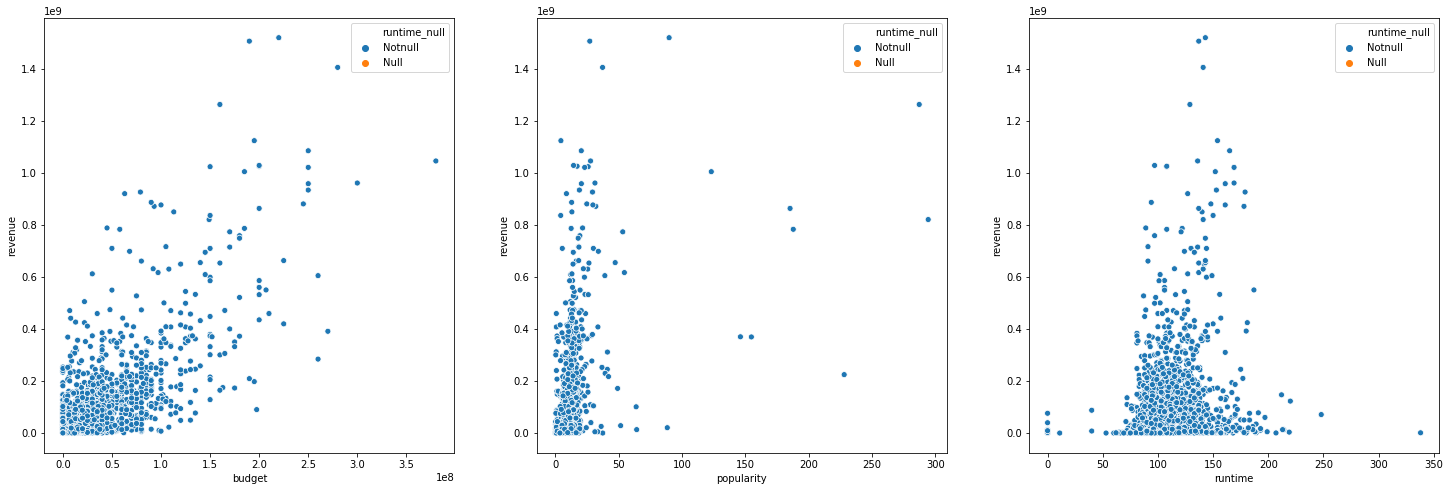

In [157]:
### For presentation

train['runtime_null'] = 'Notnull';
train['runtime_null'].loc[train.runtime.isnull()] = 'Null'

fig, ax = plt.subplots(1, 3, figsize=(25, 8))

for i, column in enumerate(['budget', 'popularity', 'runtime']):
    sns.scatterplot(x=train[column], y=train['revenue'], ax=ax[i], x_jitter=True, y_jitter=True, hue=train.runtime_null);

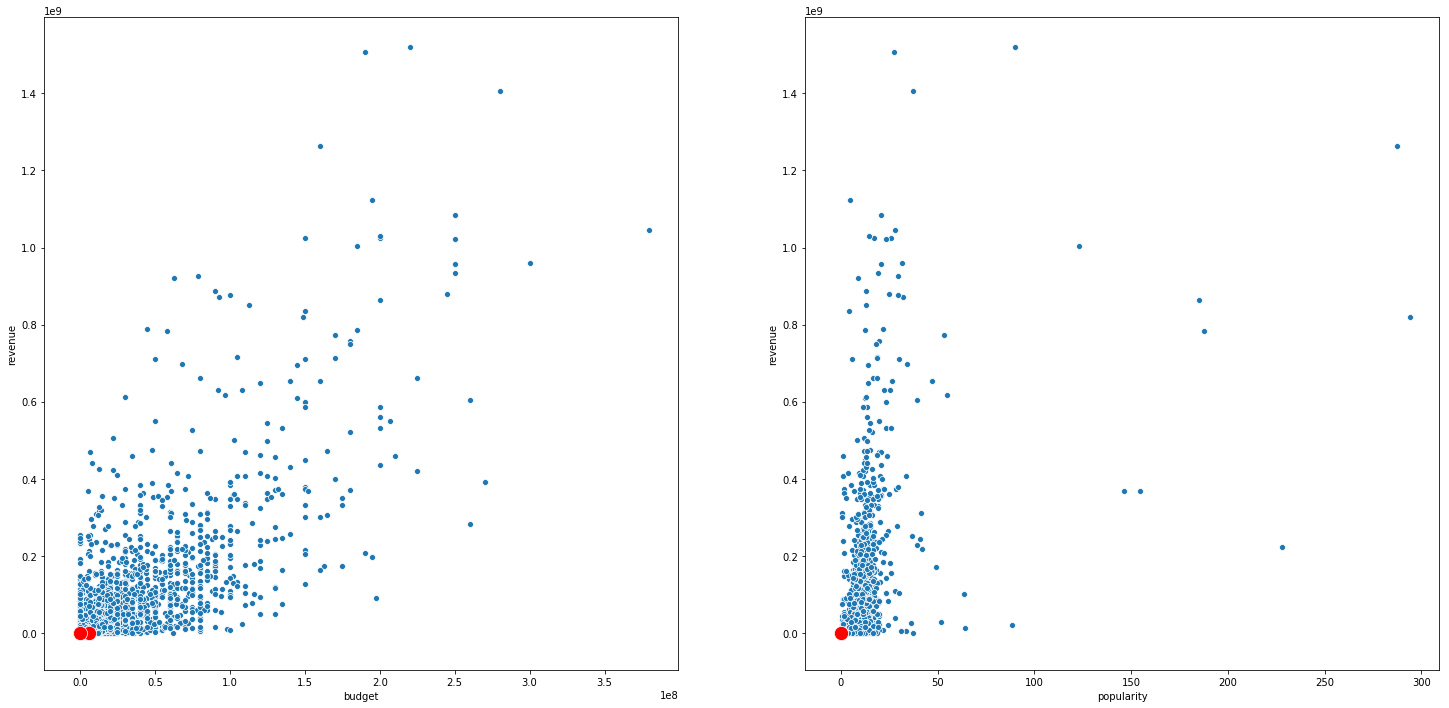

In [158]:
### For presentation

train['runtime_null'] = 'Notnull';
train['runtime_null'].loc[train.runtime.isnull()] = 'Null'
temp = train[train.runtime.isnull()]
fig, ax = plt.subplots(1, 2, figsize=(25, 12))

for i, column in enumerate(['budget', 'popularity']):
    sns.scatterplot(x=train[column], y=train['revenue'], ax=ax[i], x_jitter=True, y_jitter=True);
    sns.scatterplot(x=temp[column], y=temp['revenue'], ax=ax[i], x_jitter=True, y_jitter=True, color='red', s=200);

In [159]:
def to_binary(column):
    column[column.notnull()] = '1'
    column[column.isnull()] = '0'
    return column

In [160]:
# train[['belongs_to_collection', 'homepage', 'tagline']].apply(to_binary)

for i in ['belongs_to_collection', 'homepage', 'tagline']:
    train[i] = to_binary(train[i])

In [161]:
print('Ratio of Null value for each column')
print('After binary transformation\n')
print(train.isnull().sum().sort_values(ascending=False) / train.shape[0])

train.head()

Ratio of Null value for each column
After binary transformation

Keywords                        0.0920000000
production_companies            0.0520000000
production_countries            0.0183333333
spoken_languages                0.0066666667
crew                            0.0053333333
cast                            0.0043333333
overview                        0.0026666667
genres                          0.0023333333
runtime                         0.0006666667
poster_path                     0.0003333333
original_language               0.0000000000
month                           0.0000000000
belongs_to_collection           0.0000000000
budget                          0.0000000000
homepage                        0.0000000000
imdb_id                         0.0000000000
runtime_null                    0.0000000000
original_title                  0.0000000000
popularity                      0.0000000000
revenue                         0.0000000000
status                          0.0

,year,month,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,runtime_null
id,,,,,,,,,,,,,,,,,,,,,,,,
1,2015,2,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.5753930000,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",93.0000000000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Notnull
2,2004,8,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",0,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.2488950000,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",113.0000000000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,Notnull
3,2014,10,0,3300000,"[{'id': 18, 'name': 'Drama'}]",1,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.2999900000,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",105.0000000000,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,1,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,Notnull
4,2012,3,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",1,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.1749360000,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",122.0000000000,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,0,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,Notnull
5,2009,2,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",0,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.1480700000,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.0000000000,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,0,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,Notnull


### 2) Meaningless features : Let's drop it

- 'imdb_id' feature is index of imdb website for business purpose which is assigned unique value to each movie
- 'original_title', 'title', 'overview' : We cannot extract information from those values even lengths of values didn't show enough correlation with target feature
- 'poster_path' is just file paths of movie poster we won't use it to build prediction model

In [34]:
print('number of unique values of "imdb_id" column :', len(train.imdb_id.unique()))

number of unique values of "imdb_id" column : 3000


Length of title don't give any information to us as well



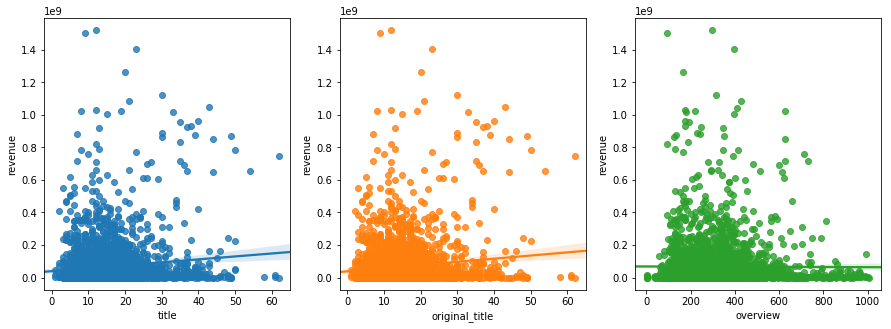

In [35]:
print("Length of title don't give any information to us as well\n")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.regplot(x=train.title.apply(len),
            y=train.revenue, 
            ax=ax[0])

sns.regplot(x=pd.Series(train.original_title, dtype='str').apply(len),
            y=train.revenue,
            ax=ax[1])

sns.regplot(x=pd.Series(train.overview, dtype='str').apply(len),
            y=train.revenue,
            ax=ax[2]);

In [162]:
print('number of features before dropping some of them :', train.shape[1])
dump = pd.concat((dump, train.imdb_id, train.original_title, train.title, train.overview, train.poster_path), axis=1) #Let's keep it, just in case
train.drop(['imdb_id', 'original_title', 'title', 'overview', 'poster_path'], axis=1, inplace=True)
print('After :', train.shape[1])

number of features before dropping some of them : 24
After : 19


### 3) Categorical variables

#### (1) Genres

We analysed movies based on "genres" features. For this;
- Because of the dataset format, we are not able to reach "genres" information directly, we need to manipulate "genres" feature. 
- After we reach required "genres" informaiton. We create new dataframe base which shows the "genred" information of  each movies. This dataframe is different form our "train" dataframe. The "train" datafram is unique with "id" feature but our new "genres"-based dataframe is unique with "id" and "genres" information.
- There are some wrong informations in original dataframe such as show "budget" as 113 and "revenue" as 10 million and vice versa. We removed this outliers from dataframe.

In [230]:
replace_genres = ["[", "]", ":", ",", "{", "}", "id", "name", "'", "1","2","3","4","5","6","7","8","9","0"]
replace_production_companies = ["[", "]", ":", ",", "{", "}", "'", "name", "id","1","2","3","4","5","6","7","8","9","0"]
replace_production_countries = ["[", "]", ":", ",", "{", "}", "'", "name", "iso_3166_1"]

In [234]:
def genre_dummy_variable(df, col, replace_value):
    temp_list = df[col].str.replace('}', ';')

    for i in replace_value:
        temp_list = temp_list.str.replace(i, '')
    
    temp_set = (set(str(x).split(';')) for x in temp_list)
    temp_set = sorted(set.union(*temp_set))
    
    temp_set_unique = [str(i).strip() for i in temp_set]
    temp_set_unique = set(temp_set_unique)
    temp_set_unique.discard('')
    
    indicator_mat = pd.DataFrame(np.zeros((len(temp_list), len(temp_set))), columns=temp_set, dtype='int')
    for i, category in enumerate(temp_list):
        indicator_mat.loc[i, str(category).split(';')] = 1
        
    temp = []
    for i in range(1, 22):
        temp.append(list(indicator_mat.iloc[:, [i, i+19]].max(axis=1)))
    
    indicator_mat_unique = pd.DataFrame(np.array(temp).T, columns=sorted(list(temp_set_unique)), index=df.index)
        
    return temp_list, indicator_mat_unique

In [235]:
temp, genre = genre_dummy_variable(train, 'genres', replace_genres)

In [236]:
temp

id
1                                                 Comedy;
2                Comedy;    Drama;    Family;    Romance;
3                                                  Drama;
4                                     Thriller;    Drama;
5                                    Action;    Thriller;
6                     Animation;    Adventure;    Family;
7                                    Horror;    Thriller;
8                                            Documentary;
9          Action;    Comedy;    Music;    Family;    ...
10                                      Comedy;    Music;
11                                                 Drama;
12                                                Comedy;
13                                                 Drama;
14                                      Comedy;    Crime;
15         Action;    Thriller;    Science Fiction;   ...
16                            Action;    Crime;    Drama;
17                                   Horror;    Thriller;
18         

In [166]:
print(genre.shape)
genre.head()

(3000, 21)


,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,nan
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [167]:
dump = pd.concat((dump, train.genres), axis=1)
print(dump.shape)

train.drop('genres', axis=1, inplace=True)
train = pd.merge(train, genre, how='inner', left_index=True, right_index=True)
print(train.shape)

(3000, 7)
(3000, 39)


#### (2) Production company, country

- hmm let's add these features if our model doesn't show enough performance

In [168]:
print(train.shape)
print(dump.shape)

dump = pd.concat((dump, train.production_companies, train.production_countries), axis=1)
train.drop(['production_companies', 'production_countries'], axis=1, inplace=True)

print(train.shape)
print(dump.shape)

(3000, 39)
(3000, 7)
(3000, 37)
(3000, 9)


#### (3) Keyword, cast, crew, spoken language
- Apparently, Informations in these column are valuable to predict movie's revenue but we have to put a lot of effort on refining it from raw data so let's put aside those features for a while

In [169]:
print(train.shape)
print(dump.shape)

dump = pd.concat((dump, train.Keywords, train.cast, train.crew, train.spoken_languages), axis=1)
train.drop(['Keywords', 'cast', 'crew', 'spoken_languages'], axis=1, inplace=True)

print(train.shape)
print(dump.shape)

(3000, 37)
(3000, 9)
(3000, 33)
(3000, 13)


#### (4) Original language

In [170]:
language = pd.get_dummies(train.original_language, prefix='lan', drop_first=True)

print(train.shape)
print(dump.shape)

dump = pd.concat((dump, train.original_language), axis=1)
train.drop('original_language', axis=1, inplace=True)

print(train.shape)
print(dump.shape)

train = pd.merge(train, language, how='inner', left_index=True, right_index=True)

print(train.shape)

(3000, 33)
(3000, 13)
(3000, 32)
(3000, 14)
(3000, 67)


### 4) Outliers, Normalization

In [171]:
train.head()

,year,month,belongs_to_collection,budget,homepage,popularity,runtime,status,tagline,revenue,runtime_null,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,nan,lan_bn,lan_cn,lan_cs,lan_da,lan_de,lan_el,lan_en,lan_es,lan_fa,lan_fi,lan_fr,lan_he,lan_hi,lan_hu,lan_id,lan_it,lan_ja,lan_ko,lan_ml,lan_mr,lan_nb,lan_nl,lan_no,lan_pl,lan_pt,lan_ro,lan_ru,lan_sr,lan_sv,lan_ta,lan_te,lan_tr,lan_ur,lan_vi,lan_zh
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2015,2,1,14000000,0,6.5753930000,93.0000000000,Released,1,12314651,Notnull,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2004,8,1,40000000,0,8.2488950000,113.0000000000,Released,1,95149435,Notnull,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014,10,0,3300000,1,64.2999900000,105.0000000000,Released,1,13092000,Notnull,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2012,3,0,1200000,1,3.1749360000,122.0000000000,Released,0,16000000,Notnull,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2009,2,0,0,0,1.1480700000,118.0000000000,Released,0,3923970,Notnull,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [172]:
train.dtypes

year                      object
month                     object
belongs_to_collection     object
budget                     int64
homepage                  object
popularity               float64
runtime                  float64
status                    object
tagline                   object
revenue                    int64
runtime_null              object
Action                     int32
Adventure                  int32
Animation                  int32
Comedy                     int32
Crime                      int32
Documentary                int32
Drama                      int32
Family                     int32
Fantasy                    int32
Foreign                    int32
History                    int32
Horror                     int32
Music                      int32
Mystery                    int32
Romance                    int32
Science Fiction            int32
TV Movie                   int32
Thriller                   int32
War                        int32
Western   

#### (1) Status

In [173]:
train.status.value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

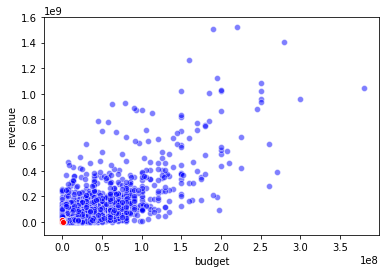

In [174]:
sns.scatterplot(train.budget, train.revenue, color='blue', alpha=.5, x_jitter=True, y_jitter=True)
sns.scatterplot(train[train.status=='Rumored'].budget, train[train.status=='Rumored'].revenue, color='red')

In [175]:
train[train.status=='Rumored']

,year,month,belongs_to_collection,budget,homepage,popularity,runtime,status,tagline,revenue,runtime_null,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,nan,lan_bn,lan_cn,lan_cs,lan_da,lan_de,lan_el,lan_en,lan_es,lan_fa,lan_fi,lan_fr,lan_he,lan_hi,lan_hu,lan_id,lan_it,lan_ja,lan_ko,lan_ml,lan_mr,lan_nb,lan_nl,lan_no,lan_pl,lan_pt,lan_ro,lan_ru,lan_sr,lan_sv,lan_ta,lan_te,lan_tr,lan_ur,lan_vi,lan_zh
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
610,1997,1,1,0,0,5.1213090000,71.0000000000,Rumored,1,273644,Notnull,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1008,2011,2,0,0,0,0.0078770000,60.0000000000,Rumored,0,60,Notnull,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1217,1986,8,0,0,0,10.2739790000,89.0000000000,Rumored,1,13418091,Notnull,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1619,1998,2,0,891000,0,0.1792460000,89.0000000000,Rumored,1,229000,Notnull,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [176]:
train.status[train['status'] =='Released'] = 1
train.status[train['status'] =='Rumored'] = 0

#train.drop('status', axis=1, inplace=True)

#### (2) Runtime

year                     0
month                    0
belongs_to_collection    0
budget                   0
homepage                 0
popularity               0
runtime                  2
status                   0
tagline                  0
revenue                  0
runtime_null             0
Action                   0
Adventure                0
Animation                0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Family                   0
Fantasy                  0
Foreign                  0
History                  0
Horror                   0
Music                    0
Mystery                  0
Romance                  0
Science Fiction          0
TV Movie                 0
Thriller                 0
War                      0
Western                  0
nan                      0
lan_bn                   0
lan_cn                   0
lan_cs                   0
lan_da                   0
lan_de                   0
l

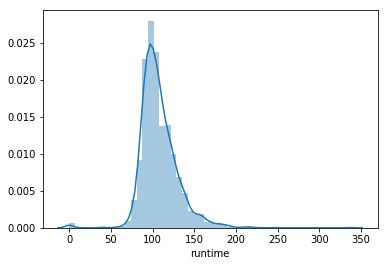

In [177]:
sns.distplot(train.runtime.dropna())

print(train.isnull().sum())
train.dropna(axis=0, inplace=True)

#### (3) Budget

- The fact that more than 27% of movies have '0' budget doesn't make sense. Instead of deleting those samples, we tried to replace '0' values to more reliable numbers by using other features
- Also, as you can see in the boxplot, there are lots of outlier in budget feature

Number of movies which have 0 budget : 811


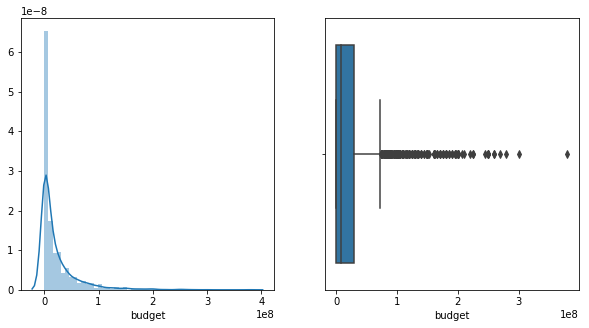

In [179]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

print('Number of movies which have 0 budget :', sum(train.budget==0))

sns.distplot(train.budget, ax=ax[0])
sns.boxplot(train.budget, ax=ax[1]);

In [186]:
# predict actual budget of '0' budget movies with ML model

train.drop('runtime_null', inplace=True, axis=1)

zero_budget = train[train.budget==0]
zero_budget.drop(['revenue', 'budget'], axis=1, inplace=True)

non_zero_budget = train[train.budget!=0]
non_zero_budget.drop('revenue', axis=1, inplace=True)
budget_X = non_zero_budget.drop('budget', axis=1)
budget_y = non_zero_budget.budget
print(train.shape)
print(non_zero_budget.shape)
print(zero_budget.shape)

non_zero_budget.head()

(2998, 66)
(2187, 65)
(811, 64)


,year,month,belongs_to_collection,budget,homepage,popularity,runtime,status,tagline,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,nan,lan_bn,lan_cn,lan_cs,lan_da,lan_de,lan_el,lan_en,lan_es,lan_fa,lan_fi,lan_fr,lan_he,lan_hi,lan_hu,lan_id,lan_it,lan_ja,lan_ko,lan_ml,lan_mr,lan_nb,lan_nl,lan_no,lan_pl,lan_pt,lan_ro,lan_ru,lan_sr,lan_sv,lan_ta,lan_te,lan_tr,lan_ur,lan_vi,lan_zh
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2015,2,1,14000000,0,6.5753930000,93.0000000000,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2004,8,1,40000000,0,8.2488950000,113.0000000000,1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2014,10,0,3300000,1,64.2999900000,105.0000000000,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2012,3,0,1200000,1,3.1749360000,122.0000000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1987,8,0,8000000,0,0.7432740000,83.0000000000,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- To predict or find out relevant amount of budget for each movie which has 0 record in budget column, We are going to RandomForestRegressor as our dataset hasn't been normalized yet.

In [187]:
from sklearn.linear_model import Lasso

budget_X_train, budget_X_test, budget_y_train, budget_y_test = train_test_split(budget_X, budget_y)
lm = Lasso()

grid = GridSearchCV(lm, param_grid={'alpha':[0, 0.1, 0.3, 0.5, 0.7, 1]})
grid.fit(budget_X_train, budget_y_train)

print('train score : ', mean_squared_error(budget_y_train, grid.predict(budget_X_train))**.5)
print('test score : ',  mean_squared_error(budget_y_test, grid.predict(budget_X_test))**.5)


train score :  29495942.262539096
test score :  31913458.807477638


In [109]:
from sklearn.linear_model import Lasso

budget_X_train, budget_X_test, budget_y_train, budget_y_test = train_test_split(budget_X, budget_y)
lm = Lasso()

grid = GridSearchCV(lm, param_grid={'alpha':[0, 0.1, 0.3, 0.5, 0.7, 1]})
grid.fit(budget_X_train, budget_y_train)

print('train score : ', mean_squared_error(budget_y_train, [max(x, 0) for x in grid.predict(budget_X_train)] ))
print('test score : ',  mean_squared_error(budget_y_test, [max(x, 0) for x in grid.predict(budget_X_test)] ))

train score :  883522605886872.2
test score :  828504706542186.8


In [210]:
y = pd.Series(budget_y_train, dtype=int, name='y')
prediction = pd.Series(grid.predict(budget_X_train), dtype=int, name='prediction')


In [217]:
temp

,0
y,
13000000,"18,575,180.0039150715"
8700000,"58,598,051.7865481377"
15000000,"-1,544,992.6530518532"
67000000,"63,138,477.4967417717"
38000000,"59,039,851.9491567612"
9000000,"42,183,162.6519649029"
25000000,"90,953,748.9887070656"
350000,"-2,570,801.3427290916"
80000000,"46,742,731.9281120300"


In [218]:
budget_X_train, budget_X_test, budget_y_train, budget_y_test = train_test_split(budget_X, budget_y)

rf = RandomForestRegressor()
rf.fit(budget_X_train, budget_y_train)

print('train score : ', r2_score(rf.predict(budget_X_train), budget_y_train))
print('test score : ',  r2_score(rf.predict(budget_X_test), budget_y_test))   

print("It's super overfitted :(")

# budget_X_train, budget_X_test, budget_y_train, budget_y_test = train_test_split(budget_X, budget_y)

# rf = RandomForestRegressor(n_jobs=-1)

# grid = GridSearchCV(rf, param_grid={'max_depth':[2, 5, 10, 20, None], 'min_samples_leaf':[1, 3, 5, 10]})
# grid.fit(budget_X_train, budget_y_train)

# print('train score : ', r2_score(grid.predict(budget_X_train), budget_y_train))
# print('test score : ',  r2_score(grid.predict(budget_X_test), budget_y_test))

train score :  0.8833767738546078
test score :  0.20693453978515297
It's super overfitted :(


In [219]:
zero_budget['budget'] = rf.predict(zero_budget).astype(int)

budget_predicted = pd.concat((zero_budget, non_zero_budget), axis=0).sort_index()

In [221]:
zero_budget['budget']

id
5         3183436
8         2994100
9        33800000
12       18500000
18       22725000
23       29850000
24        8110000
25       13700000
26       10153762
32       14905662
34       38020000
37        8260000
39         615974
41       17238000
49        7965000
53       10683774
54        9620011
56       21455000
57        4090678
59        7047345
63       23450000
68       14896224
72       41040000
74        5404187
79       23325000
90       14370000
92        8558187
94       19900000
96        2329010
98        3503158
103      12584350
104       8415013
105       6932500
117       6522200
118      60437680
119      19200000
127       7900001
133       3737400
137       5907418
139      22300000
142      15180000
146       7718000
147      14909152
149      28260000
151       6230000
152       7188936
153      12700000
155       9520000
158      50741573
162      10050000
166      10255391
167       3965000
171      12104576
172      10150000
178        583551
182    

In [ ]:
print(train.shape)

train.head()

In [ ]:
print(train.budget.mean())

train.budget = budget_predicted.budget

print(train.budget.mean())

## 4. Build ML models

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('revenue', axis=1), train.revenue, train_size=.7, random_state=0)

### 1. Linear Regression

First, Let's build a linear regression model because it is fast and easy to interpret, so we can use this model as our bench-mark model for comparing performance of other sophiscated ML models. Before going on, we need to conduct feature scaling in order to earn proper prediction results.

In [ ]:
scaler = StandardScaler()

train_numeric = X_train[['budget', 'popularity', 'runtime']]
test_numeric = X_test[['budget', 'popularity', 'runtime']]
X_train_numeric = scaler.fit_transform(train_numeric)
X_test_numeric = scaler.transform(test_numeric)

X_train_scaled = X_train.copy()
X_train_scaled.budget = X_train_numeric[:, 0]
X_train_scaled.popularity = X_train_numeric[:, 1]

X_test_scaled = X_test.copy()
X_test_scaled.budget = X_test_numeric[:, 0]
X_test_scaled.popularity = X_test_numeric[:, 1]

In [ ]:
lm = LinearRegression(n_jobs=-1)
lm.fit(X_train_scaled, y_train)

In [ ]:
print("first linear model's R-square : {:.4f}" .format(lm.score(X_test_scaled, y_test)))

### We got 10%p advaced R2 score with same the model after data-preprocessing :D